In [1]:
# Import required libraries
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("utils"))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("Configurations"))))
from utils import chartChecker as check
from utils import simulaltionUtils
from utils import plotUtils
from utils import dataframeUtil
from utils import statisticsUtils
from simulation import simulateTrend
import Configurations
import pandas as pd
import numpy as np
import statistics
import datetime
import matplotlib.pyplot as plt
from random import randrange
import matplotlib.patches as patches
import seaborn as sns

Zeitreihen des Qualitätsmerkmals simulieren

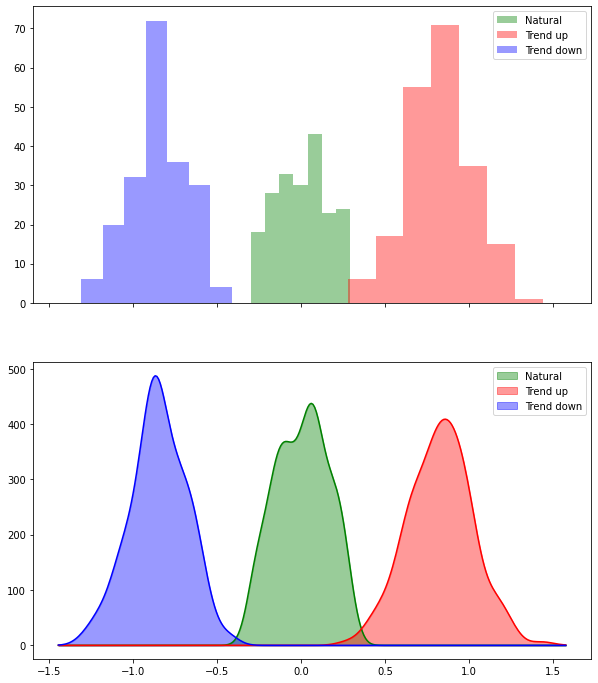

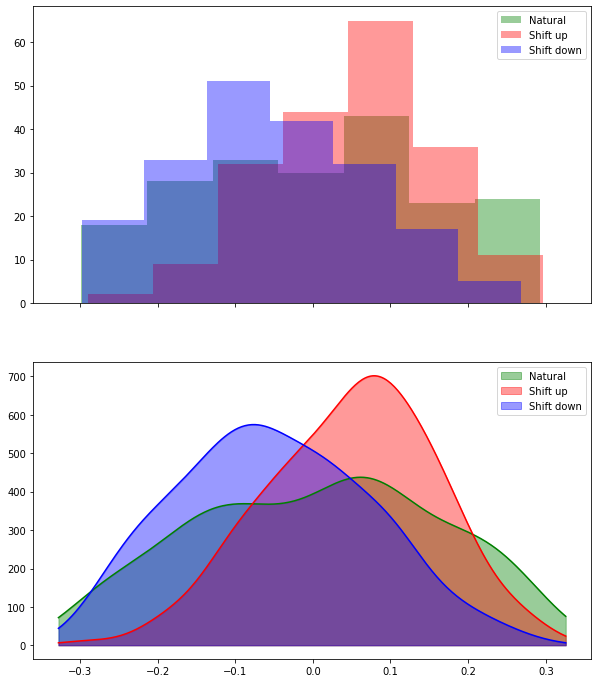

<AxesSubplot:>

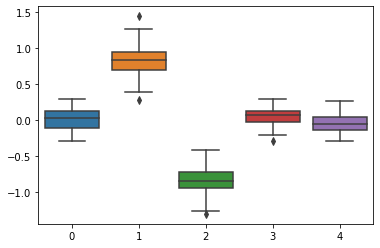

In [5]:
# slope analye
#slopes = plotUtils.plotSlopes("_F")
slopes = statisticsUtils.getRegSlopesForAllPattern()
label_1 = 'Natural'
label_2 = 'Trend up'
label_3 = 'Trend down'
label_4 = 'Shift up'
label_5 = 'Shift down'
natural = slopes[0]
plotUtils.plot3kd(natural,slopes[1],slopes[2],label_1,label_2,label_3,"F")
plotUtils.plot3kd(natural,slopes[3],slopes[4],label_1,label_4,label_5,"F")

sns.boxplot(data=slopes)

In [ ]:
# simulaltionUtils. slopeFilter = False
# simulateShift.start(1)
# simulateShift.start(-1)
# simulateTrend.start("up")
# simulateTrend.start("down")

slopes = plotUtils.plotSlopes("")
plotUtils.plot3kd(natural,slopes[1],slopes[2],label_1,label_2,label_3,"")
plotUtils.plot3kd(natural,slopes[3],slopes[4],label_1,label_4,label_5,"")

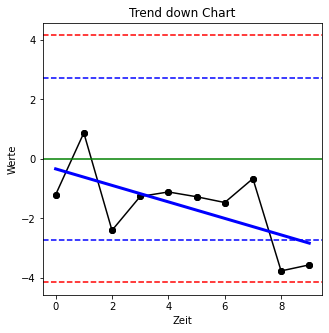

Trend slope : -0.27721260420299254


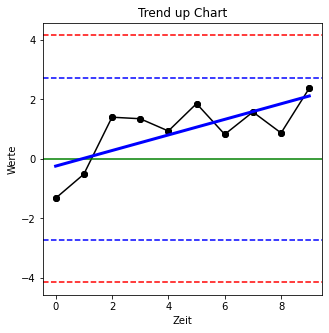

Trend slope : 0.2617050353229091


In [8]:
plotUtils.figsize=5
chart = dataframeUtil.getRandomChartFrom_csv(setting.trendDowntrainDatasetName,setting.trendDownChartPlotTitle,-1)
trendslop,_ =plotUtils.plotRegression(chart[0])
print("Trend slope :",trendslop)
chart = dataframeUtil.getRandomChartFrom_csv(setting.trendUptrainDatasetName,setting.trendUpChartPlotTitle,-1)
trendslop,_ =plotUtils.plotRegression(chart[0])
print("Trend slope :",trendslop)

In [ ]:

chart = dataframeUtil.getRandomChartFrom_csv(setting.shiftUptrainDatasetName,setting.shiftUpChartPlotTitle,-1)
plotUtils.plotRegression(chart[0])
chart = dataframeUtil.getRandomChartFrom_csv(setting.shiftDowntrainDatasetName,setting.shiftDownChartPlotTitle,-1)
plotUtils.plotRegression(chart[0])

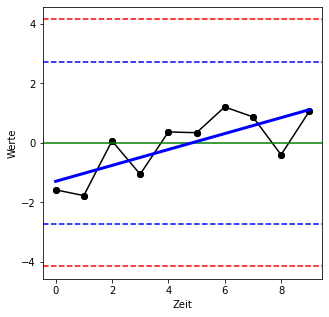

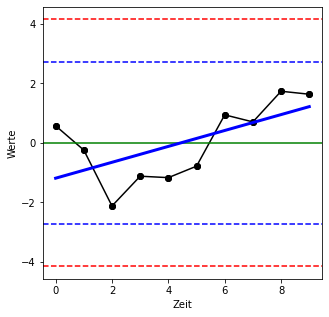

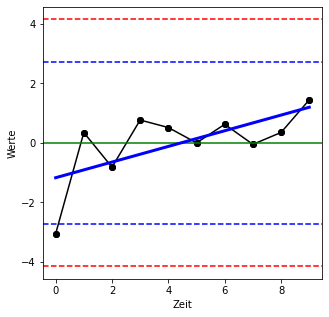

In [9]:
# plot max slopes in normal charts
df = statisticsUtils.getLinRegParaDataFrame(setting.trendUptrainDatasetName,setting.targetColumName_trendUp,0.0)
x = df.slops.values
df = df.loc[(df['slops'] >= 0.257)]
charts = df.iloc[:,-1].values

for chart in charts:
     plotUtils.plotChart(chart,"")
     plotUtils.plotRegression(chart)

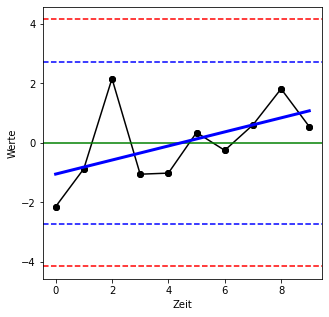

(0.23614464989731565, -1.0477561088879257)

In [51]:
# plot one
df = statisticsUtils.getLinRegParaDataFrame(setting.trendUptrainDatasetName,setting.targetColumName_trendUp,0.0)
df = df.loc[(df['slops'] >= 0.236)]
chart = df.points.values
plotUtils.plotChart(chart[0],"")
plotUtils.plotRegression(chart[0])


11


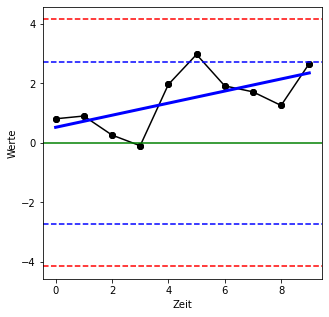

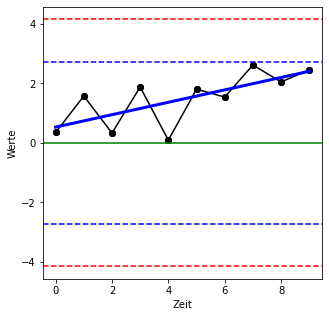

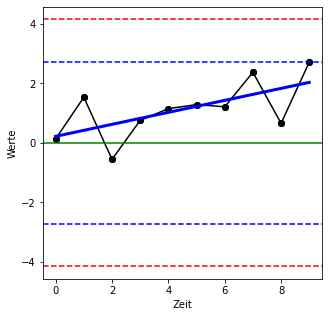

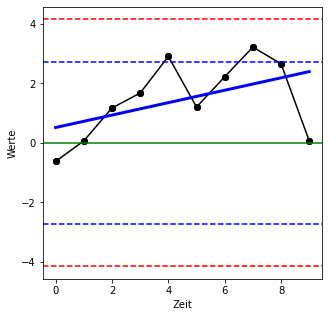

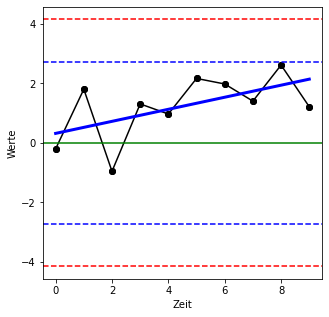

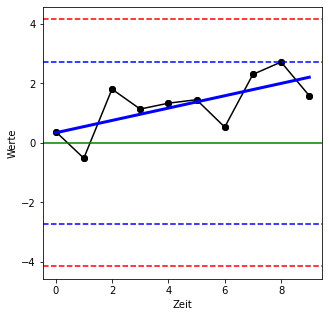

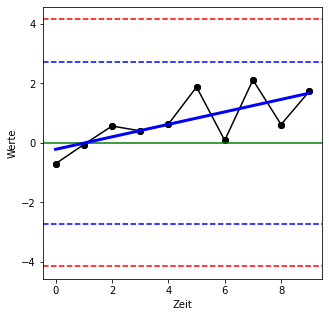

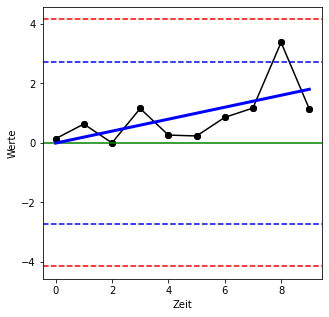

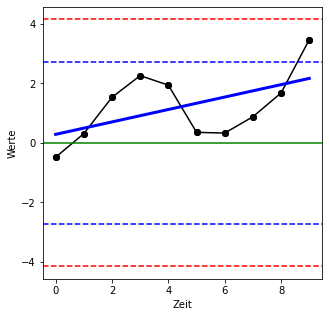

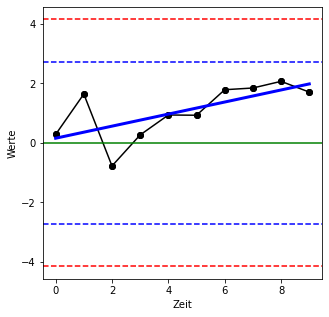

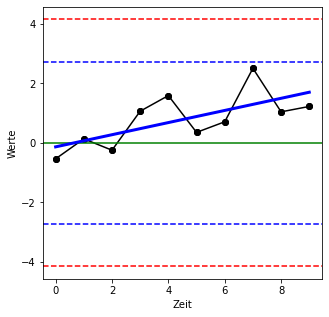

In [10]:
# plot min slopes in trend up charts
df = statisticsUtils.getLinRegParaDataFrame(setting.trendUptrainDatasetName,setting.targetColumName_trendUp,1.0)
df = df.loc[(df['slops'] <= 0.21)& (df['slops'] >= 0.2)]
print(len(df))
charts = df.iloc[:,-1].values
for chart in charts:
     plotUtils.plotChart(chart,"")
     plotUtils.plotRegression(chart)

In [17]:
df = statisticsUtils.getLinRegParaDataFrame(setting.trendUptrainDatasetName,setting.targetColumName_trendUp,0.0)
x = df.slops.values
#df.loc[(df['slops'] >= 0.236)]
df = df.loc[(df['slops'] >= 0.1)]
df.head()

slops  intercepts  MeanAbsoluteError  MeanSquaredError  \
1   0.125621   -0.384529           0.775053          0.776691   
4   0.110168   -0.696361           0.618670          0.525502   
14  0.122224    0.004338           0.827125          1.070264   
32  0.115820   -0.181850           0.538128          0.419791   
33  0.111512   -0.434382           0.661399          0.644804   

                                               points  
1   [-0.6715624844724719, 0.9539441585503594, -0.5...  
4   [-1.5665731564377168, -0.0679336207467066, -0....  
14  [1.1700073849224473, 0.358376078401282, -0.287...  
32  [-0.6372965242871961, 1.2626375704387718, -0.0...  
33  [-0.2741231545696199, -0.3668578200942447, -0....

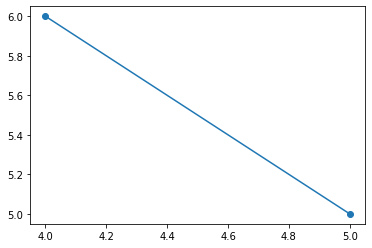

In [21]:
import matplotlib.pyplot as plt
from scipy import stats

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]

x = [5,4  ]
y = [5,6 ]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.savefig('plots/{}'.format("plots_reg"), dpi=300)
plt.show()
